In [40]:
# test Jupyter
print('Hello world')

Hello world


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\Data analatics\Python\cleaned.csv")
data.head(4)

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679


In [43]:
year_group = data.groupby('year')['amount'].sum()
year_group

year
2000       131350
2001       774526
2002      1093002
2003      2703200
2004      4342946
2005      7129136
2006      7682219
2007     19014820
2008     25183191
2009     31782539
2010     46010449
2011     60980073
2012     86746346
2013    203808953
2014    401383841
2015    635759487
2016    558113646
2017    322405079
2018    119620939
Name: amount, dtype: int64

Best Year: 2015


Text(0.5, 1.0, 'total sales in the year')

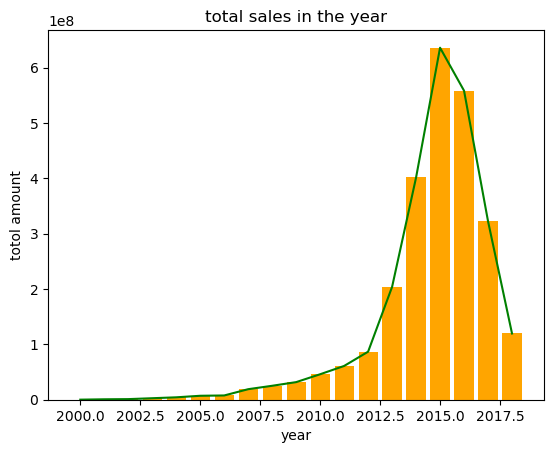

In [30]:
# 1. Best year of sales
year_sales = data.groupby("year")["amount"].sum()
print("Best Year:", year_sales.idxmax())

year_group = data.groupby('year')['amount'].sum()
plt.bar(year_group.index,year_group.values,color= 'orange')
plt.plot(year_group.index,year_group.values,color='green')
plt.xlabel('year')
plt.ylabel('totol amount')
plt.title('total sales in the year')

Best Month: 1


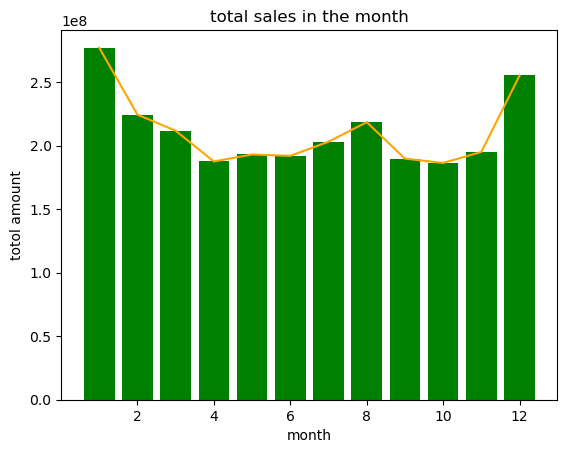

In [31]:
# 2. Best month of sales

month_group = data.groupby('month')['amount'].sum()
plt.bar(month_group.index,month_group.values,color= 'green')
plt.plot(month_group.index,month_group.values,color='orange')
plt.xlabel('month')
plt.ylabel('totol amount')
plt.title('total sales in the month')

month_sales = data.groupby("month")["amount"].sum()
print("Best Month:", month_sales.idxmax())

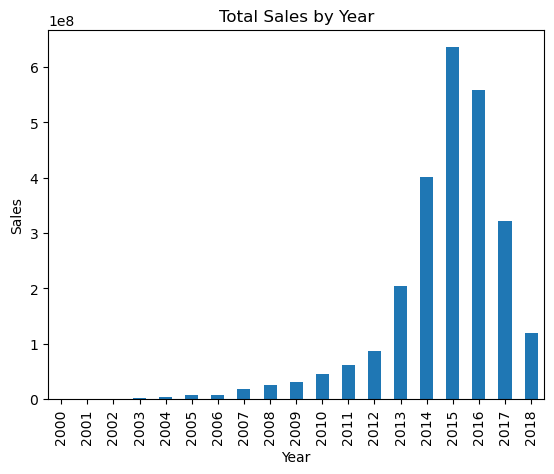

In [33]:
# 3. Year-wise total sales
plt.figure()
year_sales.plot(kind="bar")
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()


In [20]:
# 4. Brand sold most (2015–2018)
brand_sales = data[(data.year >= 2015) & (data.year <= 2018)].groupby("brand")["amount"].sum()
print("Top Brand (2015–2018):", brand_sales.idxmax())

Top Brand (2015–2018): Bose


Text(0.5, 1.0, 'Top 5 brands in 2018')

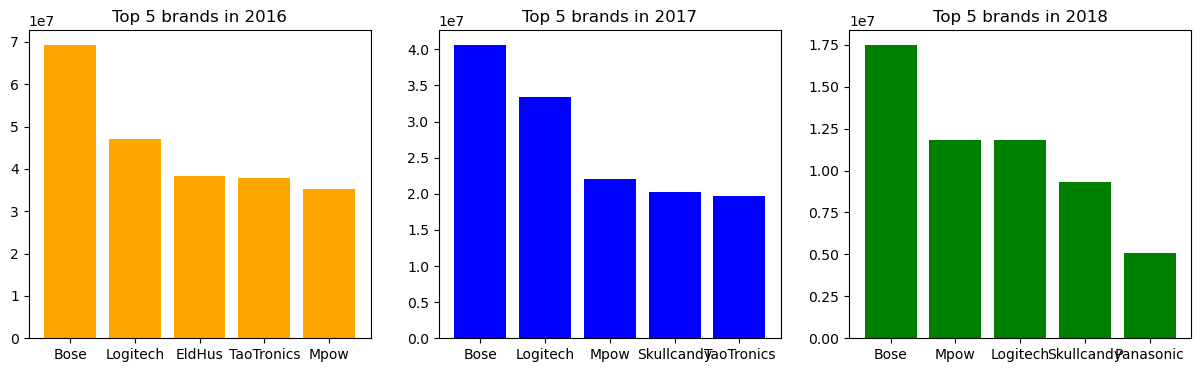

In [36]:
# 5. Create different plots for each year 2016,2017,2018 for top 5 brands sold the most

data_2016 = data[data['year']==2016]
data_2017 = data[data['year']==2017]
data_2018 = data[data['year']==2018]

brand_group_2016 = data_2016.groupby('brand')['amount'].sum().nlargest(5)
brand_group_2017 = data_2017.groupby('brand')['amount'].sum().nlargest(5)
brand_group_2018 = data_2018.groupby('brand')['amount'].sum().nlargest(5)

fig, axs = plt.subplots(1,3, figsize=(15,4))

axs[0].bar(brand_group_2016.index, brand_group_2016.values, color='orange')
axs[0].set_title('Top 5 brands in 2016')

axs[1].bar(brand_group_2017.index, brand_group_2017.values, color='blue')
axs[1].set_title('Top 5 brands in 2017')

axs[2].bar(brand_group_2018.index, brand_group_2018.values, color='green')
axs[2].set_title('Top 5 brands in 2018')

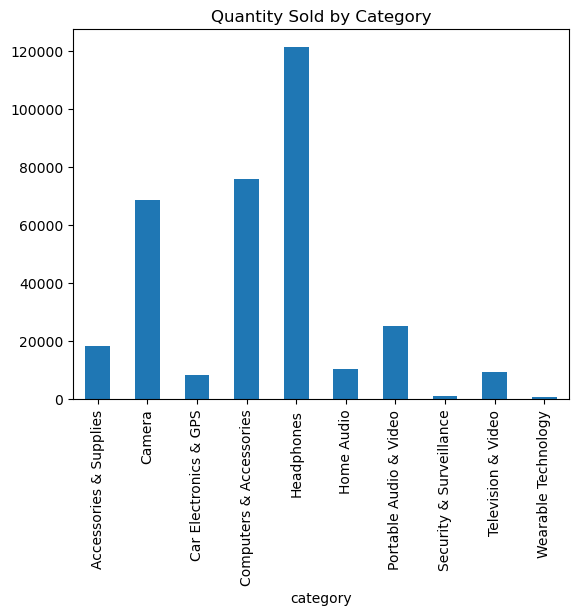

In [22]:
# 6. Product category sold most
category_qty = data.groupby("category")["quantity"].sum()
plt.figure()
category_qty.plot(kind="bar")
plt.title("Quantity Sold by Category")
plt.show()

In [23]:
# 7 & 8. Least sold brand (2015–2018)
print("Least Sold Brand:", brand_sales.idxmin())

Least Sold Brand: Archos


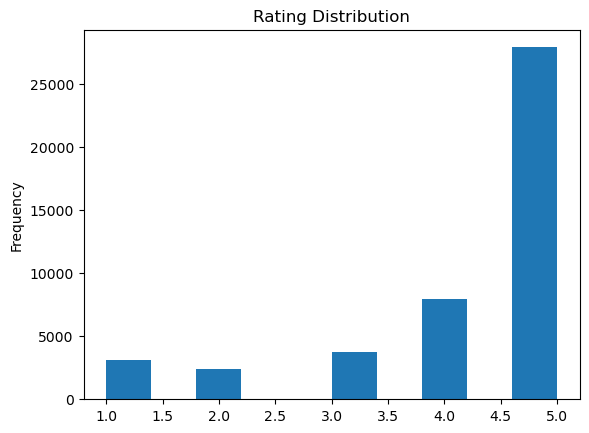

In [24]:
# 9. Rating distribution
plt.figure()
data["rating"].plot(kind="hist")
plt.title("Rating Distribution")
plt.show()


In [25]:
# 10. Most rated brand
top_rated = data[(data.year >= 2015) & (data.year <= 2018)].groupby("brand")["rating"].mean()
print("Most Rated Brand:", top_rated.idxmax())


Most Rated Brand: Savage


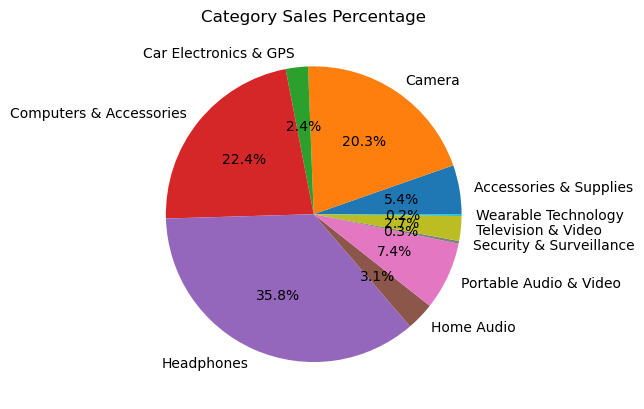

In [26]:
# 11. Category-wise sales percentage
category_pct = category_qty / category_qty.sum() * 100
plt.figure()
category_pct.plot(kind="pie", autopct="%1.1f%%")
plt.title("Category Sales Percentage")
plt.ylabel("")
plt.show()

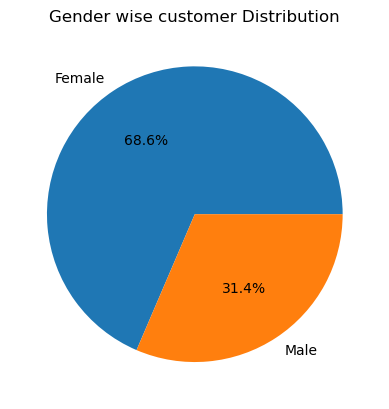

gender
Female    62379341
Male      28617057
Name: year, dtype: int64

In [39]:
# 12. Gender wise customer distribution
gender_distribution = data['gender'].value_counts()
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Gender wise customer Distribution')
plt.show()

gender_group = data.groupby('gender')['year'].sum()
gender_group

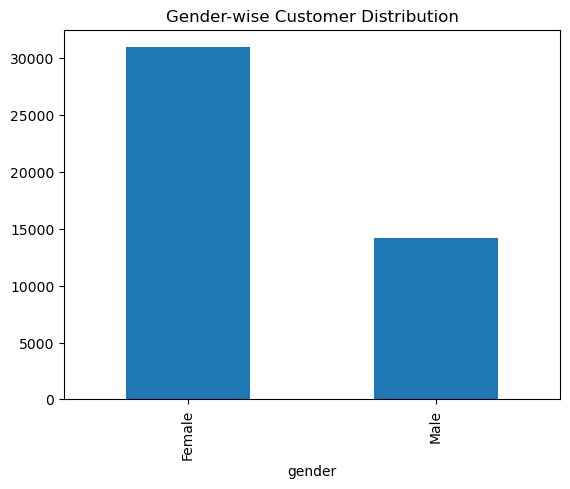

In [28]:
# 13. Gender-wise distribution
plt.figure()
data["gender"].value_counts().plot(kind="bar")
plt.title("Gender-wise Customer Distribution")
plt.show()

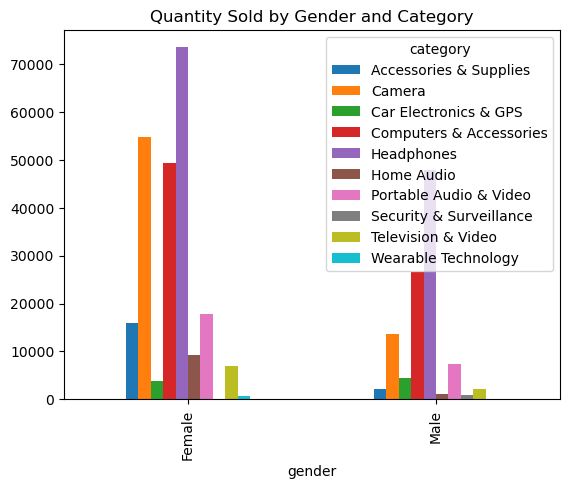

In [29]:
# 14. Gender and category quantity
gender_category = data.groupby(["gender", "category"])["quantity"].sum().unstack()
gender_category.plot(kind="bar")
plt.title("Quantity Sold by Gender and Category")
plt.show()